Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Chretien Li"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomly built BSTs

## Part A. Average number of comparisons when searching

## Question 0 [time estimate: 1 minute] 

Paste in the working code from last session's PCW for the class Node, which contains the methods for insertion, searching, and deletion. 



In [2]:
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node

    def search_data(self, value):
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def search(self, value):
        if value == self.data:
            return self
        if value < self.data:
            if self.l_child:
                return self.l_child.search(value)
            else:
                return None
        else:
            if self.r_child:
                return self.r_child.search(value)
            else:
                return None
    
    def delete(self, value):
        def transplant(node1, node2):
            """
            replaces the subtree rooted at node1 with the subtree rooted at node2
            """
            nonlocal root
            if node1.parent == None:
                root = node2
            elif node1 == node1.parent.l_child:
                node1.parent.l_child = node2
            else:
                node1.parent.r_child = node2
            if node2 != None:
                node2.parent = node1.parent

        """if a node with data = value is present in the tree rooted at Node, deletes that node and returns the root"""
        root = self
        node = root.search(value)
        if node:
            if node.l_child is None:
                transplant(node, node.r_child)
            elif node.r_child == None:
                transplant(node, node.l_child)
            else:
                y = node.r_child.minimum()
                if y.parent != node:
                    transplant(y, y.r_child)
                    y.r_child = node.r_child
                    y.r_child.parent = y
                transplant(node, y)
                y.l_child = node.l_child
                y.l_child.parent = y
        return root
    
    def inorder(self): 
        lst = []
        root = self
        def sub_inorder(root):
            if not root is None:
                sub_inorder(root.l_child)
                lst.append(root.data)
                sub_inorder(root.r_child)
        sub_inorder(root)
        return lst


## Question 1 [time estimate: 5 minutes]

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [3]:
def depth(root, node):
    """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
    """
    #default count to 0
    return search_count(root, node, 0)

def search_count(root, value, count):
    #if there is nothing depth is 0
    if root is None or root.data == value.data:
        return count
    
    elif root.data < value.data:
        count += 1
        return search_count(root.r_child, value, count)
    count += 1
    return search_count(root.l_child, value, count)

In [4]:
# Testing code 
import math
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [5]:
def avg_cmp(bst, node):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    n : float
        Average number of comparisons
        
    """
    average = []
    
    #just iterate over range don't need actual value
    for _ in range(30):
        n_comp = depth(bst, node) + 1
        average.append(n_comp)
    return int(sum(average)/len(average))

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 

## Question 1 [time estimate: 10 minutes]

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [15]:
def max_depth(bst):
    """
    Finds the maximum depth of node in a BST.
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    h : int
        The maximum depth in a BST
        
    """
    if bst is None:
        return -1
    else:
        leftSubtreeDepth = max_depth(bst.l_child)
        rightSubtreeDepth = max_depth(bst.r_child)
        return 1+max(leftSubtreeDepth,rightSubtreeDepth)

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [20]:
def avg_depth(bst, lst):
    """
    Computes the average depth of a BST
    
    Parameters
    ----------
    bst
        A Node, root of the BST
    
    Returns
    -------
    avg_d : float
        Average depth of the BST
        
    """
    av = []
    for _ in range(30):
        average_depth = avg_cmp(bst,Node(random.choice(lst))) -1
        av.append(average_depth)
    return int(sum(av)/len(av))

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3 [time estimate: 10 minutes]
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

In [29]:

import random

#test 1, simply iteratively increase values, printing out average and maximum depth
for n in range(50,20000,50):
    random_list = random.sample(range(20000), n)
    
    root = random.randint(1,1000)
    my_bst = Node(root)
    for i in random_list:
        my_bst.insert(Node(i))
    #print("This is the random list generated", random_list)    
    inorder = my_bst.inorder()
    print("Average Depth: ",avg_depth(my_bst, inorder), ", Max Depth: ", max_depth(my_bst))

Average Depth:  6 , Max Depth:  11
Average Depth:  8 , Max Depth:  15
Average Depth:  8 , Max Depth:  15
Average Depth:  8 , Max Depth:  16
Average Depth:  8 , Max Depth:  17
Average Depth:  8 , Max Depth:  18
Average Depth:  9 , Max Depth:  17
Average Depth:  8 , Max Depth:  17
Average Depth:  9 , Max Depth:  21
Average Depth:  10 , Max Depth:  20
Average Depth:  9 , Max Depth:  19
Average Depth:  11 , Max Depth:  21
Average Depth:  13 , Max Depth:  23
Average Depth:  12 , Max Depth:  20
Average Depth:  10 , Max Depth:  21
Average Depth:  11 , Max Depth:  21
Average Depth:  10 , Max Depth:  21
Average Depth:  11 , Max Depth:  22
Average Depth:  10 , Max Depth:  21
Average Depth:  11 , Max Depth:  24
Average Depth:  10 , Max Depth:  18
Average Depth:  11 , Max Depth:  23
Average Depth:  13 , Max Depth:  22
Average Depth:  10 , Max Depth:  21
Average Depth:  11 , Max Depth:  22
Average Depth:  13 , Max Depth:  24
Average Depth:  13 , Max Depth:  22
Average Depth:  12 , Max Depth:  26
Av

Average Depth:  16 , Max Depth:  32
Average Depth:  15 , Max Depth:  31
Average Depth:  17 , Max Depth:  30
Average Depth:  16 , Max Depth:  33
Average Depth:  17 , Max Depth:  32
Average Depth:  15 , Max Depth:  32
Average Depth:  14 , Max Depth:  34
Average Depth:  17 , Max Depth:  31
Average Depth:  16 , Max Depth:  31
Average Depth:  17 , Max Depth:  34
Average Depth:  17 , Max Depth:  31
Average Depth:  16 , Max Depth:  33
Average Depth:  15 , Max Depth:  31
Average Depth:  19 , Max Depth:  33
Average Depth:  16 , Max Depth:  32
Average Depth:  16 , Max Depth:  32
Average Depth:  17 , Max Depth:  31
Average Depth:  16 , Max Depth:  30
Average Depth:  16 , Max Depth:  32
Average Depth:  16 , Max Depth:  30
Average Depth:  17 , Max Depth:  33
Average Depth:  16 , Max Depth:  30
Average Depth:  18 , Max Depth:  34
Average Depth:  19 , Max Depth:  34
Average Depth:  16 , Max Depth:  34
Average Depth:  19 , Max Depth:  36
Average Depth:  17 , Max Depth:  31
Average Depth:  15 , Max Dep

In [30]:
#test 2, we'll use exponentially increasing values
lst = [5,10,20,50,100,500,1000,10000,50000,400000]

for n in lst:
    random_list = random.sample(range(n), n)
    
    root = random.randint(1,1000)
    my_bst = Node(root)
    for i in random_list:
        my_bst.insert(Node(i))
    #print("This is the random list generated", random_list)    
    inorder = my_bst.inorder()
    print("Average Depth: ",avg_depth(my_bst, inorder), ", Max Depth: ", max_depth(my_bst))

Average Depth:  2 , Max Depth:  4
Average Depth:  3 , Max Depth:  7
Average Depth:  4 , Max Depth:  7
Average Depth:  6 , Max Depth:  12
Average Depth:  7 , Max Depth:  14
Average Depth:  10 , Max Depth:  21
Average Depth:  10 , Max Depth:  25
Average Depth:  16 , Max Depth:  31
Average Depth:  19 , Max Depth:  37
Average Depth:  23 , Max Depth:  44


Both average depth and max depth seem to be increasing.However, neither appears to be increasing at a linear rate. From test 1 we can see that initially, the depths generally increased , but it appears to tail off as list gets larger and larger. This possibly suggests a logrithmic growth. Considering that a binary search tree is binary, this would make sense. In test two, we simplify and use exponentially larger list lengths. Surely enough, now we can see the value increasing again.


## Question 4 [time estimate: 7 minutes]

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [31]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
N= []
max_depths = []
avg_depths = []
for i in range(1,500):
    N.append(i)
    root = random.randint(1,500)
    my_bst = Node(root)
    lst = [random.randint(1,i+1) for x in range(i+1)]
    for j in lst:
        my_bst.insert(Node(j))
    inorder = my_bst.inorder()
    max_depths.append(max_depth(my_bst))
    avg_depths.append(avg_depth(my_bst, inorder))

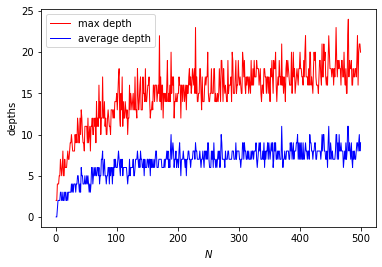

In [32]:
plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()